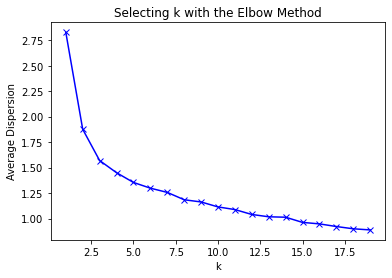

In [3]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


# function to encode
def enco(variable,data):
    data[variable]
    dummies = pd.get_dummies(data[variable], prefix=variable,dtype='float')
    dummies
    data = data.join(dummies)
    return data


# load the data
#os.chdir(r'D:\Marketing Analytics\HW2')
data = pd.read_csv('transactions_n100000.csv')

# explore the data
data.columns.values
data.describe()
data.head(2).T
data.iloc[:,3].unique()
data.iloc[:,2].unique()
data.iloc[:,4].unique()

# one-hot encoding
data=enco('location',data)
data=enco('item_name',data)
data.columns.values

# Multiply each type of cuisine by item_count
data['item_name_burger']=data['item_name_burger']*data['item_count']
data['item_name_fries']=data['item_name_fries']*data['item_count']
data['item_name_salad']=data['item_name_salad']*data['item_count']
data['item_name_shake']=data['item_name_shake']*data['item_count']


# Combine the different dishes that everyone ordered
name1=['item_name_burger','item_name_fries','item_name_salad','item_name_shake']
name2=['ticket_id', 'order_timestamp','location', 'item_name','item_count', 'lat', 'long', 'location_1', 'location_2','location_3', 'location_4', 'location_5', 'location_6','location_7', 'location_8', 'location_9']
sub_data1 = data.groupby('ticket_id')[name2].mean()
sub_data2 = data.groupby('ticket_id')[name1].sum()
data = pd.concat([sub_data1,sub_data2],axis=1)

# pick the needed varibales
data = data.iloc[:,2:]

# Min-Max scale
# fit
scaler = MinMaxScaler()
scaler.fit(data)
# transform
data_scaled = pd.DataFrame(scaler.transform(data),columns=data.columns)
data_scaled.head(3).T

# KMeans
# choose k value with elbow method
K = range(1, 20)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    meanDispersions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()  # k=5

# cluster
kmeans = KMeans(n_clusters=5).fit(data)
data['type']=kmeans.labels_
data['type'].unique()


data.to_csv('transactions_n100000_clustered_3.csv')